## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

In [2]:
plt.style.use('fivethirtyeight')
warnings.simplefilter("ignore")

## Buscando dados

In [3]:
#Preço de fechamento do IBOVESPA

ibov = yf.download('^BVSP', start='2020-12-20', end='2021-12-20')[['Adj Close', 'Close']]

ibov = pd.DataFrame(ibov['Adj Close'])
ibov.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2020-12-21,116016.0
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0
2020-12-29,119475.0


In [4]:
#Renomeando a coluna

ibov.rename(columns={'Adj Close':'IBOVESPA'}, inplace=True)
ibov.head()

,IBOVESPA
Date,
2020-12-21,116016.0
2020-12-22,116348.0
2020-12-23,117857.0
2020-12-28,119051.0
2020-12-29,119475.0


In [5]:
#Algumas métricas estatísticas

ibov.describe()

,IBOVESPA
count,245.000000
mean,117305.946939
std,7308.151995
min,100775.000000
25%,112282.000000
50%,118430.000000
75%,122202.000000
max,130776.000000


In [79]:
#Calculando o log-retorno simples IBOVESPA

retorno_simples = np.log(ibov / ibov.shift())[1:]
retorno_simples.head()

,IBOVESPA
Date,
2020-12-22,0.002858
2020-12-23,0.012886
2020-12-28,0.010080
2020-12-29,0.003555
2020-12-30,-0.001416


In [80]:
#Algumas métricas estatísticas

retorno_simples.describe()

,IBOVESPA
count,244.000000
mean,-0.000319
std,0.013288
min,-0.052558
25%,-0.008294
50%,0.000774
75%,0.008470
max,0.035971


In [81]:
#Cauda superior e inferior:

cauda_sup = np.round(np.mean(retorno_simples) + np.std(retorno_simples) * 3, 4) * 100
cauda_inf = np.round(np.mean(retorno_simples) + np.std(retorno_simples) * (-3), 4) * 100

print(f'Assumindo que os retornos diários do Ibovespa possuem distribuição normal, pode-se afirmar que 99.74% das observações estiveram entre {cauda_inf[0]}% e {cauda_sup[0]}%.')

Assumindo que os retornos diários do Ibovespa possuem distribuição normal, pode-se afirmar que 99.74% das observações estiveram entre -4.01% e 3.95%.


In [96]:
cauda_sup / 100

IBOVESPA    0.0395
dtype: float64

In [97]:
cauda_inf / 100

IBOVESPA   -0.0401
dtype: float64

In [82]:
# z = Média - Média da série / Desvio padrão da série

zscore = (0 - np.mean(retorno_simples) / np.std(retorno_simples))
zscore

IBOVESPA    0.024074
dtype: float64

In [102]:
#Probabilidade 

z = zscore

prob = np.round(stats.norm.cdf(z), 3) * 100
prob

print(f'A probabilidade dos retornos negativos durante a série analisada foi de {prob[0]}% e a probalidade de retornos positivos foi de {100 - prob[0]}%.')

A probabilidade dos retornos negativos durante a série analisada foi de 51.0% e a probalidade de retornos positivos foi de 49.0%.


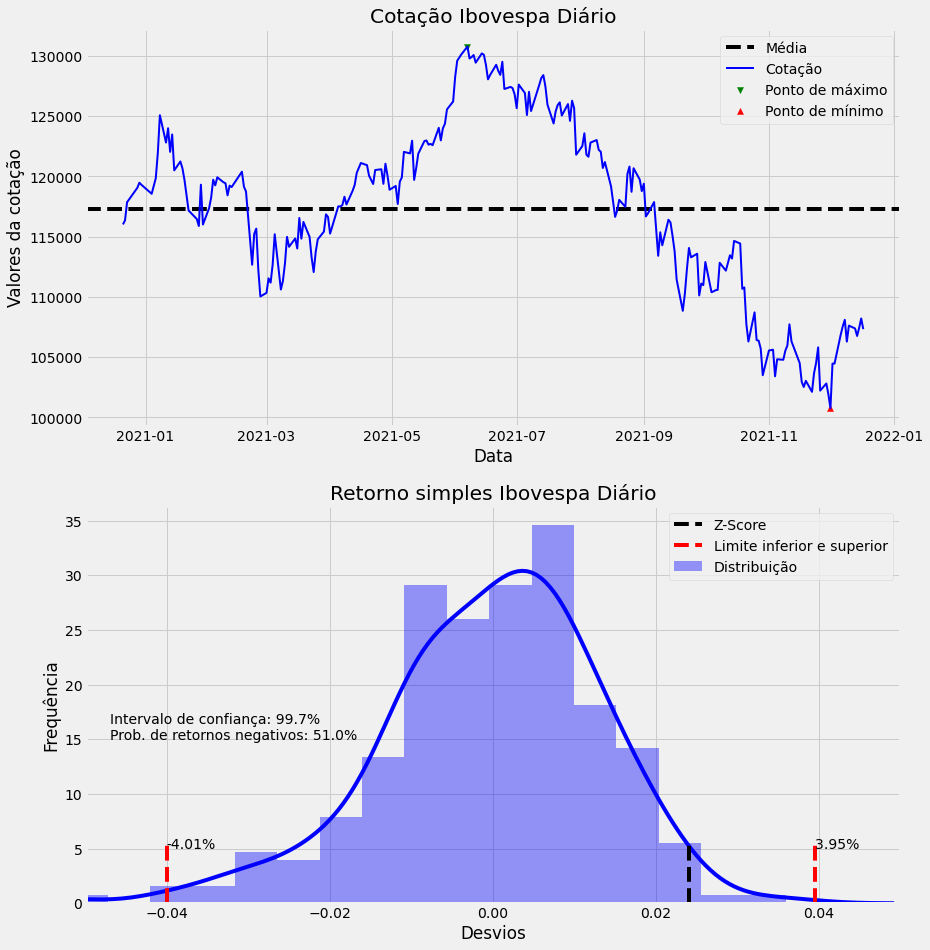

In [105]:
#Visualização

plt.figure(figsize=(13, 15));
plt.subplot(211);
plt.title('Cotação Ibovespa Diário');
plt.scatter(np.datetime64('2021-06-07'), ibov.max() * 1.000001, marker='v', color='green', label='Ponto de máximo');
plt.scatter(np.datetime64('2021-12-01'), ibov.min() * 1.0000001, marker='^', color='red', label='Ponto de mínimo');
plt.axhline(y=117305.946939, color='black', linestyle='--', label='Média');
plt.plot(ibov, label='Cotação', color='blue', linewidth=2);
plt.xlabel('Data');
plt.ylabel('Valores da cotação');
plt.legend(loc=1);

plt.subplot(212);
sns.distplot(retorno_simples, color='blue', label='Distribuição');
#plt.scatter(zscore, 30, color='black')
plt.axvline(x=0.024074, ymax=0.15, color='black', linestyle='--', label='Z-Score');
plt.axvline(x=0.0395, ymax=0.15, color='red', linestyle='--');
plt.axvline(x=-0.0401, ymax=0.15, color='red', linestyle='--', label='Limite inferior e superior');
plt.title('Retorno simples Ibovespa Diário');
plt.ylabel('Frequência');
plt.xlabel('Desvios');
plt.xlim([-0.05, 0.05]);
plt.text(-0.0401, 5, f'{cauda_inf[0]}%');
plt.text(0.0395, 5, f'{cauda_sup[0]}% ');
plt.text(-0.047, 15, f'Intervalo de confiança: 99.7%\nProb. de retornos negativos: {prob[0]}%');
plt.legend(loc=1);

SCRIPT FINALIZADO!